In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import xarray as xr

### Preprocessing

In [2]:
precipCal = pd.read_csv('precipitationCal Data.csv')

In [3]:
for i in range(3652):
    precipCal['time'][i] = precipCal['time'][i][:10]
    
precipCal['time'] = pd.to_datetime(precipCal['time'], format='%Y-%m-%d')
precipCal.head()

,time,precipitationCal
0,2001-01-01,"[17.329309463500977, 27.902912139892578, 34.33..."
1,2001-01-02,"[35.19463348388672, 27.76654052734375, 18.4890..."
2,2001-01-03,"[16.94203758239746, 11.227675437927246, 48.812..."
3,2001-01-04,"[20.935012817382812, 14.287378311157227, 13.11..."
4,2001-01-05,"[2.271533727645874, 10.376913070678711, 8.9069..."


In [4]:
column_list = []
for i in range(225):
    colName = 'precipitationCal_'+str(i)
    column_list.append(colName)
    
column = []
for i in range(3652):
    values = (precipCal['precipitationCal'][i])[1:-1].split(', ')
    for j in range(225):
        values[j] = float(values[j])
    column.append(values)

In [5]:
calSplit = pd.DataFrame(np.column_stack(list(zip(*column))), columns=column_list)

In [6]:
calSplit

,precipitationCal_0,precipitationCal_1,precipitationCal_2,precipitationCal_3,precipitationCal_4,precipitationCal_5,precipitationCal_6,precipitationCal_7,precipitationCal_8,precipitationCal_9,...,precipitationCal_215,precipitationCal_216,precipitationCal_217,precipitationCal_218,precipitationCal_219,precipitationCal_220,precipitationCal_221,precipitationCal_222,precipitationCal_223,precipitationCal_224
0,17.329309,27.902912,34.331448,36.106491,28.313553,22.343315,15.562146,17.313404,17.398394,15.631536,...,0.017672,0.623855,0.000000,0.990622,0.107623,0.155027,0.000000,0.000222,0.001059,0.170179
1,35.194633,27.766541,18.489019,21.819479,17.775288,21.556389,18.234875,24.476213,20.709044,27.433151,...,0.259616,0.918001,1.337987,0.881817,0.166394,0.011014,1.055559,1.027510,0.096882,0.081447
2,16.942038,11.227675,48.812778,65.612114,48.224422,24.605593,25.185324,23.278702,24.141319,23.886179,...,1.560159,1.613709,1.589815,1.566429,3.053795,2.147802,1.876650,3.852067,2.415415,1.993752
3,20.935013,14.287378,13.114537,8.286098,9.234212,8.688240,8.543026,13.017234,16.213320,14.230496,...,13.936455,10.887053,10.416513,10.058251,10.060767,1.924302,0.931968,1.362625,2.775538,4.240115
4,2.271534,10.376913,8.906925,5.326809,1.420617,1.467431,1.464463,2.688712,2.712233,3.335240,...,0.062611,0.066455,0.000000,0.000000,0.000000,0.062558,0.057333,0.031409,0.037391,0.038596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,0.283610,1.980873,3.468959,2.447074,3.278378,4.044055,6.886439,9.649260,10.885081,12.220076,...,6.917093,3.263332,1.354083,0.833713,0.535352,0.715669,0.831271,0.615990,1.478001,2.224321
3648,5.900194,6.176653,12.422379,9.719407,6.237170,3.182266,2.363985,4.677182,8.332596,8.176822,...,1.146102,2.090024,5.205466,7.212513,7.440534,7.167834,5.182045,6.113485,9.934593,10.943758
3649,28.648680,26.562168,22.368481,14.666425,7.834162,25.859035,25.537550,15.084959,12.371813,9.517365,...,1.286098,2.161227,4.295135,5.332625,11.310312,8.567055,13.202668,16.849140,21.299393,29.786797
3650,8.735123,10.223583,3.327227,2.403113,3.273492,4.727993,5.481760,4.328533,3.439352,4.006973,...,15.128482,16.702799,12.655154,13.225263,19.979506,21.561136,17.428755,16.170801,17.212297,16.897997


In [7]:
floods = pd.read_excel('Flood Events Final.xlsx')
floods = floods.drop(columns=['Unnamed: 0'])
floods.head()

,Date,Bernam River,Selangor River,Buloh River,Klang River,Langat River,Sepang River
0,2001-01-25,0,0,0,1,0,0
1,2001-02-19,1,0,0,0,0,0
2,2001-04-03,0,0,0,1,1,0
3,2001-04-09,0,0,0,1,1,0
4,2001-04-13,0,0,0,1,0,0


In [8]:
from datetime import date, timedelta

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2001, 1, 1)
end_date = date(2011, 1, 1)
dates = []
for single_date in daterange(start_date, end_date):
    dates.append(single_date.strftime("%Y-%m-%d"))

nonFloods = pd.DataFrame({
    'Date':dates,
    'Bernam River':0,
    'Selangor River':0,
    'Buloh River':0,
    'Klang River':0,
    'Langat River':0,
    'Sepang River':0,
})

nonFloods['Date'] = pd.to_datetime(nonFloods['Date'], format='%Y-%m-%d')
nonFloods.shape

(3652, 7)

In [9]:
floods = floods.append(nonFloods, ignore_index=True)
floods = floods.groupby(['Date']).sum().reset_index()

C:\Users\Hunts\AppData\Local\Temp\ipykernel_18284\3410022939.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  floods = floods.append(nonFloods, ignore_index=True)


In [10]:
result = []
for i in range(3652):
    if 1 in list(floods.iloc[i][1:]):
        result.append(1)
    else:
        result.append(0)

In [11]:
simpleFloods = pd.DataFrame({
    'Date':floods['Date'],
    'Flood':result
})

In [12]:
simpleFloods = simpleFloods.drop(columns=['Date'])

In [13]:
# December 2021 test case preprocessing
dec21 = pd.read_csv('precipitationCal Data Test Cases (Dec2021).csv')

for i in range(31):
    dec21['time'][i] = dec21['time'][i][:10]
    
dec21 = dec21.drop(columns=['time'])

column_list = []
for i in range(225):
    colName = 'precipitationCal_'+str(i)
    column_list.append(colName)
    
column = []
for i in range(31):
    values = (dec21['PrecipCals'][i])[1:-1].split(', ')
    for j in range(225):
        values[j] = float(values[j])
    column.append(values)

Dec21HqSplit = pd.DataFrame(np.column_stack(list(zip(*column))), columns=column_list)

In [14]:
# June 2021 test case preprocessing
jun21 = pd.read_csv('precipitationCal Data Test Cases (Jun2021).csv')

for i in range(30):
    jun21['time'][i] = jun21['time'][i][:10]

jun21 = jun21.drop(columns=['time'])

column_list = []
for i in range(225):
    colName = 'precipitationCal_'+str(i)
    column_list.append(colName)
    
column = []
for i in range(30):
    values = (jun21['PrecipCals'][i])[1:-1].split(', ')
    for j in range(225):
        values[j] = float(values[j])
    column.append(values)
    
Jun21HqSplit = pd.DataFrame(np.column_stack(list(zip(*column))), columns=column_list)

### Decision Tree

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

In [16]:
import imblearn
oversample = imblearn.over_sampling.SMOTE()
calSplit, simpleFloods = oversample.fit_resample(calSplit, simpleFloods)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(calSplit, simpleFloods, test_size=0.3, random_state=42)

In [18]:
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [19]:
dt_predictions = dt.predict(x_test)
cm = metrics.confusion_matrix(y_test,dt_predictions,labels=dt.classes_)

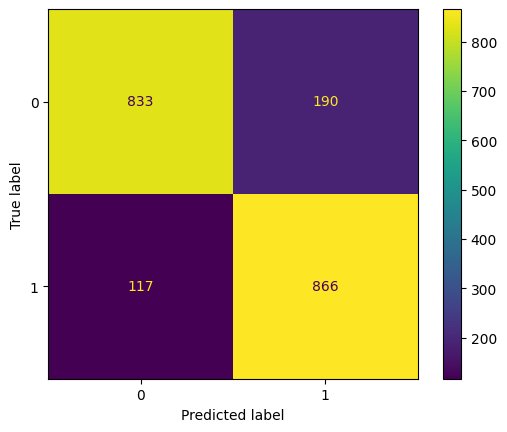

In [20]:
display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
display.plot()
plt.show()

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, dt_predictions))
print('Precision: %.3f' % precision_score(y_test, dt_predictions))
print('Recall: %.3f' % recall_score(y_test, dt_predictions))
print('F1 Score: %.3f' % f1_score(y_test, dt_predictions))

Accuracy: 0.847
Precision: 0.820
Recall: 0.881
F1 Score: 0.849


In [22]:
dt_dec_predictions = dt.predict(Dec21HqSplit)
dt_dec_predictions

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [23]:
dt_jun_predictions = dt.predict(Jun21HqSplit)
dt_jun_predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [24]:
import pickle
pickle.dump(dt, open('PrecipCalDtModel.pkl', 'wb'))

### Logistic Regression

In [25]:
logReg = LogisticRegression(max_iter=10000, class_weight='balanced')
logReg.fit(x_train, y_train)

C:\Users\Hunts\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', max_iter=10000)

In [26]:
score = logReg.score(x_test,y_test)
print(score)

0.734297108673978


In [27]:
predictions = logReg.predict(x_test)
cm = metrics.confusion_matrix(y_test,predictions,labels=logReg.classes_)
print(cm)

[[792 231]
 [302 681]]


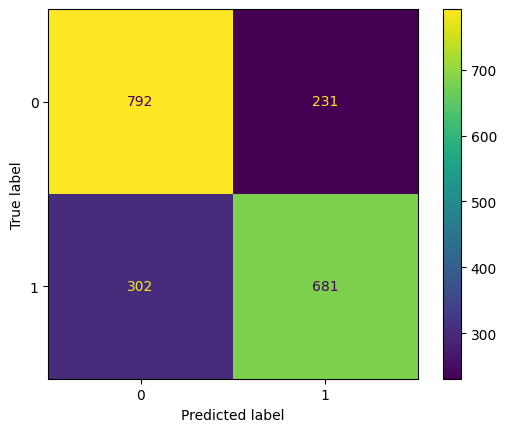

In [28]:
display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logReg.classes_)
display.plot()
plt.show()

In [29]:
print('Accuracy: %.3f' % accuracy_score(y_test, predictions))
print('Precision: %.3f' % precision_score(y_test, predictions))
print('Recall: %.3f' % recall_score(y_test, predictions))
print('F1 Score: %.3f' % f1_score(y_test, predictions))

Accuracy: 0.734
Precision: 0.747
Recall: 0.693
F1 Score: 0.719


In [30]:
logreg_dec_predictions = logReg.predict(Dec21HqSplit)
logreg_dec_predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [31]:
logreg_jun_predictions = logReg.predict(Jun21HqSplit)
logreg_jun_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [32]:
pickle.dump(logReg, open('PrecipCalLogRegModel.pkl', 'wb'))

### Naive Bayes

In [33]:
bayes = GaussianNB()
bayesPredictions = bayes.fit(x_train, y_train).predict(x_test)

C:\Users\Hunts\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
cm = metrics.confusion_matrix(y_test,bayesPredictions,labels=bayes.classes_)
print(cm)

[[824 199]
 [554 429]]


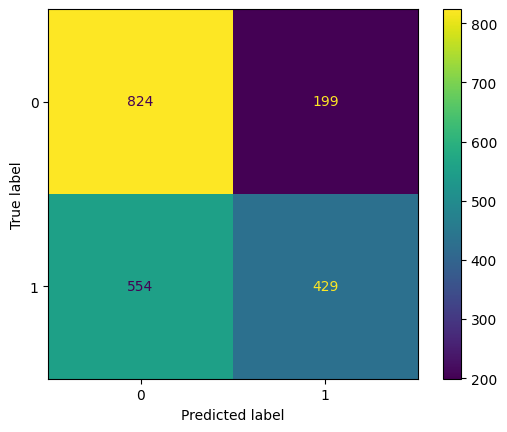

In [35]:
display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bayes.classes_)
display.plot()
plt.show()

In [36]:
print('Accuracy: %.3f' % accuracy_score(y_test, bayesPredictions))
print('Precision: %.3f' % precision_score(y_test, bayesPredictions))
print('Recall: %.3f' % recall_score(y_test, bayesPredictions))
print('F1 Score: %.3f' % f1_score(y_test, bayesPredictions))

Accuracy: 0.625
Precision: 0.683
Recall: 0.436
F1 Score: 0.533


In [37]:
bayes_dec_predictions = bayes.predict(Dec21HqSplit)
bayes_dec_predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [38]:
bayes_dec_predictions = bayes.predict(Jun21HqSplit)
bayes_dec_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [39]:
pickle.dump(bayes, open('PrecipCalBayesModel.pkl', 'wb'))

### Support Vector Machine

In [40]:
svmachine = svm.SVC()
svmachine.fit(x_train, y_train)

C:\Users\Hunts\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [41]:
svmachinePredictions = svmachine.predict(x_test)
cm = metrics.confusion_matrix(y_test,svmachinePredictions,labels=svmachine.classes_)
print(cm)

[[881 142]
 [197 786]]


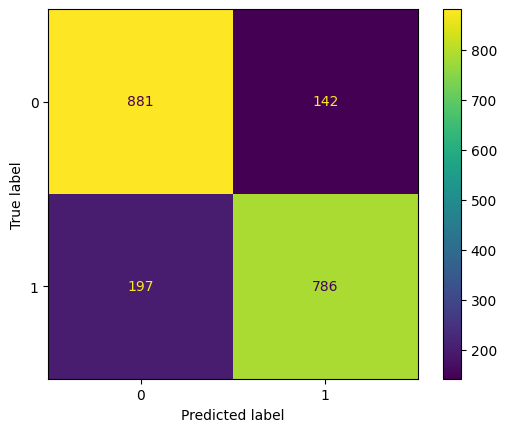

In [42]:
display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svmachine.classes_)
display.plot()
plt.show()

In [43]:
print('Accuracy: %.3f' % accuracy_score(y_test, svmachinePredictions))
print('Precision: %.3f' % precision_score(y_test, svmachinePredictions))
print('Recall: %.3f' % recall_score(y_test, svmachinePredictions))
print('F1 Score: %.3f' % f1_score(y_test, svmachinePredictions))

Accuracy: 0.831
Precision: 0.847
Recall: 0.800
F1 Score: 0.823


In [44]:
svmachine_dec_predictions = svmachine.predict(Dec21HqSplit)
svmachine_dec_predictions

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [45]:
svmachine_dec_predictions = svmachine.predict(Jun21HqSplit)
svmachine_dec_predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [46]:
pickle.dump(svmachine, open('PrecipCalSvmachineModel.pkl', 'wb'))